# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [ ]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt


model = HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1,5]

for alpha in alpha_values:
    model.par.alpha = alpha
    HM = model.sol.HM_vec
    HF = model.sol.HF_vec
    H = HM**(1-model.par.alpha) * HF**model.par.alpha
    plt.plot(model.par.wF_vec, H, label=f"alpha={alpha}")
plt.legend()
plt.show()




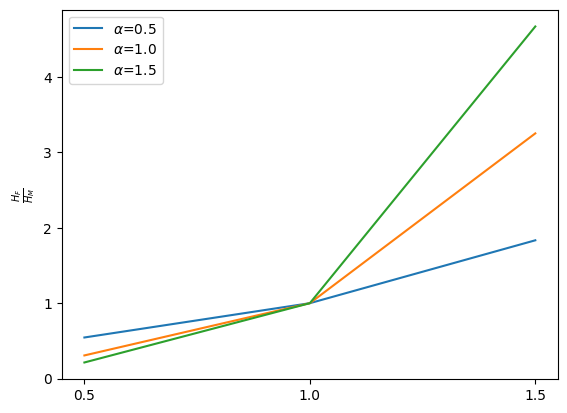

In [98]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt

model = HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

HMratio05 = []
model.par.sigma = 0.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    HMratio05.append(dis_sol.HF/dis_sol.HM) 

HMratio10 = []
model.par.sigma = 1.0
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    HMratio10.append(dis_sol.HF/dis_sol.HM) 

HMratio15 = []
model.par.sigma = 1.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    HMratio15.append(dis_sol.HF/dis_sol.HM) 


fig = plt.figure()
plt.plot(sigma_values, HMratio05, label=r"$\alpha$=0.5")
plt.plot(sigma_values, HMratio10, label=r"$\alpha$=1.0")
plt.plot(sigma_values, HMratio15, label=r"$\alpha$=1.5")
plt.ylabel(r"$\frac{H_F}{H_M}$")
plt.xticks(np.arange(min(sigma_values), max(sigma_values)+0.5, 0.5))
plt.legend()


# Question 2

Explain your code and procedure

In [ ]:
Hratio = []
model.par.sigma = 1.0
for wF in model.par.wF_vec:
    model.par.wF = wF
    dis_sol = model.solve_discrete()
    Hratio.append(dis_sol.HF/dis_sol.HM)
print(Hratio)


# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(model.par.wF_vec, Hratio)

ax.set_title('Home production')
ax.set_xlabel(r"$\frac{W_F}{W_M}$")
ax.set_ylabel(r"$\frac{H_F}{H_M}$");

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.